# MNIST - Neural Networks

### Importing the Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.set_printoptions(precision=2)

### Importing the data

In [160]:
X = np.loadtxt("train_X.csv", delimiter=",").T
Y = np.loadtxt("train_label.csv", delimiter=",").T
X_test = np.loadtxt("test_X.csv", delimiter=",").T
Y_test = np.loadtxt("test_label.csv", delimiter=",").T

In [161]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
Y

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [163]:
X.shape,X_test.shape,Y.shape,Y_test.shape

((784, 1000), (784, 350), (10, 1000), (10, 350))

In [164]:
print("Shape of X is", X.shape)
print("Shape of Y is", Y.shape)
print("Shape of X_test is", X_test.shape)
print("Total number of training example", X.shape[1])

Shape of X is (784, 1000)
Shape of Y is (10, 1000)
Shape of X_test is (784, 350)
Total number of training example 1000


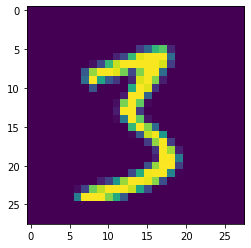

Number is 3


In [165]:
index = random.randint(0, X.shape[1])
plt.imshow(X[:, index].reshape(28,28))
plt.show()
print("Number is",list(Y[:,index]).index(1.))

### Initialize Parameters

##### Layer Sizes

In [166]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 1000
    return n_x,n_y,n_h

In [167]:
n_x,n_y,n_h = layer_sizes(X,Y)
print("The size of Input Layer n_x is", n_x)
print("The size of Hidden Layer n_h is", n_h)
print("The size of Output Layer n_y is", n_y)

The size of Input Layer n_x is 784
The size of Hidden Layer n_h is 1000
The size of Output Layer n_y is 10


#### Parameters

In [168]:
def intialize_parameters(n_x, n_y, n_h):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    return parameters

In [169]:
np.random.seed(2)
parameters = intialize_parameters(n_x, n_y, n_h)
print("W1 = "+str(parameters["W1"]))
print("b1 = "+str(parameters["b1"]))
print("W2 = "+str(parameters["W2"]))
print("b2 = "+str(parameters["b2"]))

W1 = [[-0.   -0.   -0.02 ... -0.01  0.   -0.01]
 [-0.01 -0.01  0.02 ... -0.   -0.01  0.  ]
 [ 0.01 -0.02  0.   ... -0.01  0.01  0.  ]
 ...
 [-0.01  0.01 -0.01 ...  0.02  0.01  0.  ]
 [-0.    0.01  0.01 ... -0.01  0.01  0.02]
 [-0.01  0.    0.01 ... -0.01 -0.   -0.01]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


### Forward Propagation

In [170]:
def softmax(Z):
    expZ = np.exp(Z)
    return expZ/np.sum(expZ)

In [171]:
def relu(Z):
    return np.maximum(Z,0)

In [172]:
def derivative_relu(Z):
    return np.array(Z>0, dtype=np.float32)

In [173]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}

    return A2,cache
    

In [174]:
A2,cache = forward_propagation(X, parameters)

print("A2 = "+str(A2))
print("A2 shape = "+str(A2.shape))

A2 = [[1.03e-04 1.23e-04 1.00e-04 ... 1.13e-04 1.07e-04 1.06e-04]
 [1.06e-04 8.02e-05 8.99e-05 ... 1.17e-04 8.88e-05 8.04e-05]
 [5.63e-05 7.53e-05 6.29e-05 ... 1.00e-04 1.71e-04 9.16e-05]
 ...
 [9.10e-05 7.40e-05 7.09e-05 ... 6.47e-05 5.93e-05 1.25e-04]
 [1.24e-04 9.96e-05 1.05e-04 ... 1.02e-04 6.89e-05 5.06e-05]
 [1.56e-04 8.18e-05 7.22e-05 ... 1.07e-04 1.17e-04 1.30e-04]]
A2 shape = (10, 1000)


### Cost Function

In [175]:
A2.shape, Y.shape

((10, 1000), (10, 1000))

In [176]:
def cost_function(A, Y):
    m = Y.shape[1]

    cost = -(1/m) * np.sum(Y * np.log(A))
    return cost

In [177]:
J = cost_function(A2, Y)
print(J)

9.261206064565554


### Back Propagation

In [178]:
A1 = cache["A1"]
print("A1 =",A1.shape)
A2 = cache["A2"]
print("A2 =",A2.shape)
Z2 = cache["Z2"]
print("Z2 =",Z2.shape)
W1 = parameters["W1"]
print("W1 =",W1.shape)
W2 = parameters["W2"]
print("W2 =",W2.shape)

A1 = (1000, 1000)
A2 = (10, 1000)
Z2 = (10, 1000)
W1 = (1000, 784)
W2 = (10, 1000)


In [179]:
def back_propagation(X, Y, parameters, cache):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    m = Y.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}

    return gradients

In [180]:
gradients = back_propagation(X, Y, parameters, cache)
print("dW1 =", gradients["dW1"])
print("db1 =", gradients["db1"])
print("dW2 =", gradients["dW2"])
print("db2 =", gradients["db2"])

dW1 = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
db1 = [[-3.22e-05]
 [-5.90e-05]
 [ 6.33e-06]
 [ 2.21e-04]
 [-6.06e-05]
 [ 1.73e-04]
 [-2.78e-04]
 [-2.20e-05]
 [-1.80e-04]
 [-5.03e-04]
 [ 2.84e-05]
 [-1.76e-04]
 [ 1.00e-04]
 [ 1.38e-04]
 [ 1.55e-05]
 [-5.46e-05]
 [-2.69e-05]
 [ 1.81e-05]
 [-3.85e-05]
 [ 1.73e-04]
 [ 3.59e-05]
 [ 1.47e-05]
 [-1.43e-04]
 [ 9.26e-05]
 [ 7.68e-05]
 [ 1.07e-04]
 [ 3.25e-04]
 [ 3.28e-05]
 [-3.32e-05]
 [-7.97e-05]
 [-3.10e-05]
 [ 4.73e-05]
 [-6.64e-05]
 [ 9.66e-05]
 [ 3.97e-05]
 [ 1.19e-04]
 [ 2.15e-05]
 [-1.42e-04]
 [ 1.75e-04]
 [ 9.10e-05]
 [-8.40e-05]
 [ 2.15e-04]
 [-3.34e-04]
 [ 1.86e-04]
 [-6.52e-05]
 [ 9.45e-06]
 [ 4.47e-05]
 [-6.90e-06]
 [ 2.25e-04]
 [-1.59e-05]
 [ 1.82e-05]
 [-4.14e-05]
 [-4.58e-05]
 [ 1.99e-04]
 [ 1.87e-05]
 [ 2.42e-04]
 [ 6.88e-05]
 [-1.12e-04]
 [-9.41e-05]
 [ 7.14e-06]
 [ 1.44e-05]
 [-6.78e-05]
 [-2.24e-05]
 [ 3.40e-05]


In [181]:
gradients["dW1"].shape, gradients["dW2"].shape

((1000, 784), (10, 1000))

In [182]:
gradients["db1"].shape, gradients["db2"].shape

((1000, 1), (10, 1))

### Update Parameters

In [183]:
def update_parameters(parameters, gradients, alpha):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}

    return parameters

### Complete Model

In [184]:
def model(X, Y, n_h, iterations, alpha, print_cost):
    
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]
    parameters = intialize_parameters(n_x, n_y, n_h)

    for  i in range(iterations):

        A2,cache = forward_propagation(X, parameters)
        cost = cost_function(A2, Y)
        gradients = back_propagation(X,Y,parameters,cache)
        parameters = update_parameters(parameters, gradients, alpha)

        if print_cost==1 and i%10 == 0:
            print(f"Cost after {i} iterations = {cost}.")
    
    return parameters

In [185]:
iterations = 100
alpha = 0.002
n_h = 1000
parameters = model(X,Y,n_h,iterations,alpha,1)

Cost after 0 iterations = 9.239304889421648.
Cost after 10 iterations = 8.758988927369904.
Cost after 20 iterations = 8.498267437982518.
Cost after 30 iterations = 8.380450928781233.
Cost after 40 iterations = 8.375678506279078.
Cost after 50 iterations = 8.475897692038028.
Cost after 60 iterations = 8.66676886497097.
Cost after 70 iterations = 8.925055024811737.
Cost after 80 iterations = 9.242077409603825.
Cost after 90 iterations = 9.600122228711596.
